# Occupation

### Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users.

In [22]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|', index_col = 'user_id') 

In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [24]:
users.head(10)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 4. Discover what is the mean age per occupation

In [5]:
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [6]:
users.groupby('occupation')['age'].mean().sort_values()

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
programmer       33.121212
technician       33.148148
other            34.523810
scientist        35.548387
salesman         35.666667
writer           36.311111
engineer         36.388060
lawyer           36.750000
marketing        37.615385
executive        38.718750
administrator    38.746835
librarian        40.000000
healthcare       41.562500
educator         42.010526
doctor           43.571429
retired          63.071429
Name: age, dtype: float64

In [7]:
users.groupby('occupation')['age'].mean().sort_values().head(5)

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
Name: age, dtype: float64

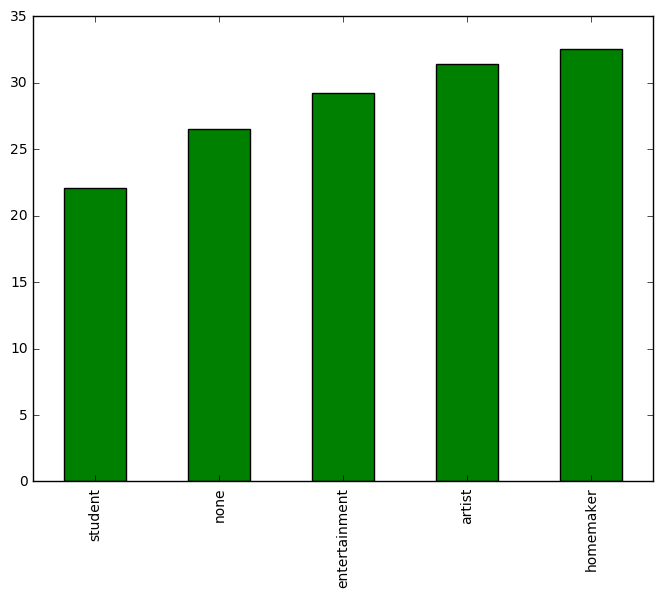

In [8]:
fig = users.groupby('occupation')['age'].mean().sort_values().head(5).plot(kind = 'bar', figsize = (8,6), color = 'g')
fig.set_xlabel('')

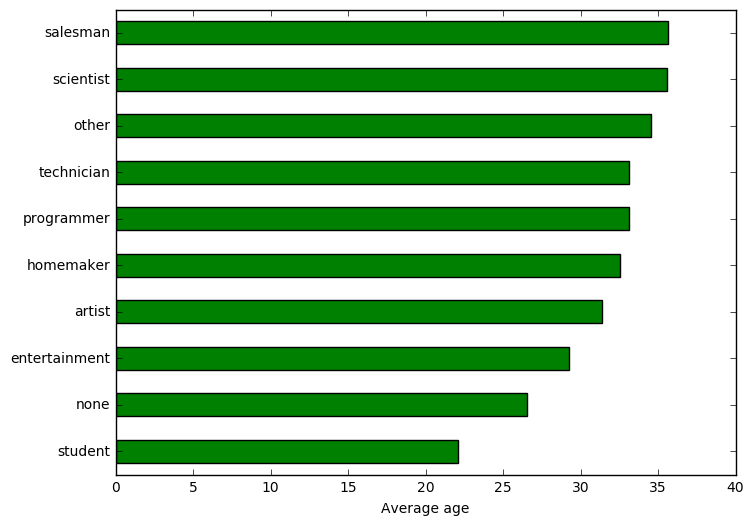

In [9]:
fig = users.groupby('occupation')['age'].mean().sort_values().head(10).plot(kind = 'barh', figsize = (8,6), color = 'g')
fig.set_ylabel('')
fig.set_xlabel('Average age')

In [10]:
users.groupby('occupation')['age'].mean().sort_values().tail(5)

occupation
librarian     40.000000
healthcare    41.562500
educator      42.010526
doctor        43.571429
retired       63.071429
Name: age, dtype: float64

### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [11]:
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
users.groupby(['occupation','gender'])['gender'].count()

occupation     gender
administrator  F          36
               M          43
artist         F          13
               M          15
doctor         M           7
educator       F          26
               M          69
engineer       F           2
               M          65
entertainment  F           2
               M          16
executive      F           3
               M          29
healthcare     F          11
               M           5
homemaker      F           6
               M           1
lawyer         F           2
               M          10
librarian      F          29
               M          22
marketing      F          10
               M          16
none           F           4
               M           5
other          F          36
               M          69
programmer     F           6
               M          60
retired        F           1
               M          13
salesman       F           3
               M           9
scientist      F     

In [13]:
df = users.groupby('occupation')['gender'].value_counts( normalize = True)

In [14]:
df.loc[:,'M'].sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

### Step 6. For each occupation, calculate the minimum and maximum ages

In [29]:
import numpy as np

In [30]:
users.groupby('occupation')['age'].agg([min, np.mean, max])

,min,mean,max
occupation,,,
administrator,21,38.746835,70
artist,19,31.392857,48
doctor,28,43.571429,64
educator,23,42.010526,63
engineer,22,36.388060,70
entertainment,15,29.222222,50
executive,22,38.718750,69
healthcare,22,41.562500,62
homemaker,20,32.571429,50


In [25]:
users.groupby('occupation')['age'].agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [15]:
users.groupby('occupation')['age'].min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [16]:
users.groupby('occupation')['age'].max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

### Step 7. For each combination of occupation and gender, calculate the mean age

In [17]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8.  For each occupation present the percentage of women and men

In [21]:
users.groupby('occupation')['gender'].value_counts(normalize = True)

occupation     gender
administrator  M         0.544304
               F         0.455696
artist         M         0.535714
               F         0.464286
doctor         M         1.000000
educator       M         0.726316
               F         0.273684
engineer       M         0.970149
               F         0.029851
entertainment  M         0.888889
               F         0.111111
executive      M         0.906250
               F         0.093750
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         M         0.833333
               F         0.166667
librarian      F         0.568627
               M         0.431373
marketing      M         0.615385
               F         0.384615
none           M         0.555556
               F         0.444444
other          M         0.657143
               F         0.342857
programmer     M         0.909091
               F         0

In [20]:
users.groupby('occupation')['gender'].value_counts(normalize = True).sort_values(ascending = False)

occupation     gender
doctor         M         1.000000
engineer       M         0.970149
technician     M         0.962963
retired        M         0.928571
programmer     M         0.909091
executive      M         0.906250
scientist      M         0.903226
entertainment  M         0.888889
homemaker      F         0.857143
lawyer         M         0.833333
salesman       M         0.750000
educator       M         0.726316
student        M         0.693878
healthcare     F         0.687500
other          M         0.657143
marketing      M         0.615385
writer         M         0.577778
librarian      F         0.568627
none           M         0.555556
administrator  M         0.544304
artist         M         0.535714
               F         0.464286
administrator  F         0.455696
none           F         0.444444
librarian      M         0.431373
writer         F         0.422222
marketing      F         0.384615
other          F         0.342857
healthcare     M         0